<a href="https://colab.research.google.com/github/sanjutvj/sanjutvj/blob/main/world_population_prospects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **World Population Prospects 2019**
  **Author : Sanju Varghese John**

# **Introduction**
<p style="text-align: justify">In order for sustainable development of Nations, it is essential that people and their populations are the centre of attention.
Each of the global population trends such as population growth, population aging, migration, and urbanization has an important role for economic and social development and for environmental conservation. The government is better able to anticipate future demographic trends by using timely and accurate population estimates and projects.</p>
 

**About Dataset**

<p style="text-align: justify"> World Population Prospects 2019, is the United Nations annual population estimate and forecasts dataset. It presents population estimates for 235 countries or area’s influenced by historical demographic data, as well as projection’s for the data. The latest assessment considers the result of 1,690 national population censuses that were conducted from 1950 to 2018 as well as information from vital registration system and 2,700 nationally representative sample surveys.
Additionally, the dataset presents population projections to 2100 at global, regional and country levels. </p>

# **Data Preparation**

1.   Load the population dataset which is stored in gdrive by using mount option. 
2.   Referring gapminder dataset to get geolocation related attributes such as iso_alpha, continent. 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#loading population csv file from gdrive
population = pd.read_csv('/content/drive/MyDrive/Population/WPP2019_TotalPopulationBySex.csv')

In [ ]:
populationbyloc = population[(population['Time'] == 2019)].groupby('Location').sum()
countrymaster = px.data.gapminder().query("year == 2007") # referring gapminder dataset for identifing geo location attributes. 
countrymaster = countrymaster[['country', 'iso_alpha', 'iso_num','continent']]
populationwithcountryMaster = pd.merge(populationbyloc, countrymaster, left_on='LocID', right_on='iso_num', how='left')
populationwithcountryMaster = populationwithcountryMaster[populationwithcountryMaster['iso_num'].notna()].sort_values(by=['PopTotal'],ascending=False)
MostPopulatedCountry = populationwithcountryMaster.head(10)[['LocID','country']]
LeastPopulatedCountry =  populationwithcountryMaster.tail(10)[['LocID','country']]
MostPopulatedCountryDetails=pd.merge(MostPopulatedCountry,population,on='LocID')
LeastPopulatedCountryDetails=pd.merge(LeastPopulatedCountry,population,on='LocID')


# **Data Visualization**

### **1**.   **All Nations Population Growth**





In [24]:
# display population growth until 2019
population_group = population[(population['Time'] <= 2019)].groupby('Time').sum()
years = population_group.index.tolist()
poptotal = population_group['PopTotal']
populationuntil2019 = population[(population['Time'] <= 2019)]
fig = px.scatter(populationuntil2019, x='Time', y='PopTotal', color='Location', title='All nations population growth')
fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Total Population"
)
fig.show()


### **2. World Populations from 1950 to 2019**

In [32]:
population_group_df = pd.DataFrame({'year':years, 'population':poptotal})
fig = px.line(population_group_df, x='year', y='population', markers=True)
fig.show()

### **3.   Most Populated Nations**



In [34]:
mostpopulation_country_2019 = MostPopulatedCountryDetails[(MostPopulatedCountryDetails['Time'] == 2019)].sort_values(by=['PopTotal'],ascending=False)
fig = px.bar(mostpopulation_country_2019, x='Location', y='PopTotal', color='Location', title='The 10 Most Populated Nations in 2019')
fig.update_traces(width=.4)
fig.update_layout(
    xaxis_title="Nations",
    yaxis_title="Population",
    legend_title="Nations"
)
fig.show()

### **4.   Variation in population in every decade**


Text(0.5, 1.0, 'Variation in Population since 1951')

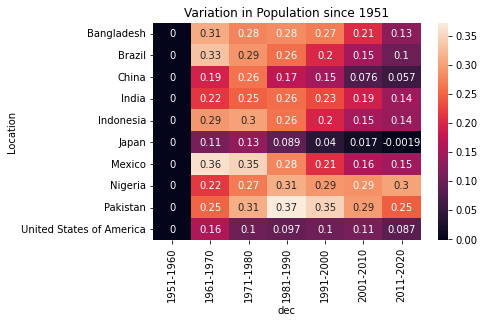

In [27]:
population_period= MostPopulatedCountryDetails[((MostPopulatedCountryDetails['Time'] <= 2019))]
d = population_period['Time'] // 10 * 10
MostPopulatedCountryDetails['dec'] = (d + 1).astype(str) + '-' + (d + 10).astype(str)
df1 = (MostPopulatedCountryDetails.pivot_table(index='Location', 
                    columns='dec', 
                    values='PopTotal', 
                    aggfunc='sum')
        .pct_change(axis=1))

df1['1951-1960'] = df1['1951-1960'].replace(np.nan, 0)
ax = sns.heatmap(df1, annot=True, fmt='.2g')
ax.set_title('Variation in Population since 1951')


### **5.   Global Gender Ratio**



In [28]:
population_sum = population[(population['Time'] <= 2019)].sum()
labels = ['Male Population','Female Population']
values = [population_sum['PopMale'], population_sum['PopFemale']]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(
    title_text="Global Gender ratio from 1950 to 2019")
fig.show()

### **6.   Women's Population Trends**


In [36]:
population_period_top10=pd.merge(MostPopulatedCountry,population_period,on='LocID')
population_group_loc_time = population_period_top10.groupby(['Time','Location'], as_index=False).sum()
fig = px.line(population_group_loc_time, x='Time', y='PopFemale', color='Location', markers=True)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Female Population",
    legend_title="Country",
    title_text="Women's Population growth"
)
fig.show()

### **7.   Female vs Male Population Comparsion**


In [37]:
population_country_2019=population[(population['Time'] == 2019)].sort_values(by=['PopTotal'],ascending=False)
population_country_2019=pd.merge(MostPopulatedCountry,population_country_2019,on='LocID')
population_sum= population_country_2019.groupby(['Location'], as_index=False).sum().sort_values(by=['PopTotal'],ascending=False)
population_male_female_group = population_sum[['Location', 'PopMale', 'PopFemale']]
labels = [population_male_female_group['Location']]
men_total = [population_male_female_group['PopMale']]
women_total = [population_male_female_group['PopFemale']]

df=pd.melt(population_male_female_group,id_vars=['Location'],var_name='gender', value_name='value')
fig = px.bar(df, x="Location", color="gender",
             y='value',
             title="Male vs Female Population in 2019",
             barmode='group',
             height=700
            )
fig.update_layout(
    xaxis_title="Nations",
    yaxis_title="Population",
    legend_title="Gender"
)
fig.show()

### **8.   Maps depicting Populations**



In [ ]:
import plotly.graph_objects as go
countrymaster = px.data.gapminder().query("year == 2007") # get master details of country for geo location
countrymaster = countrymaster[['country', 'iso_alpha', 'iso_num','continent']]
population_period_geo = population[(population['Time'] == 2019)]
population_period_geo=pd.merge(population_period_geo, countrymaster, left_on='LocID', right_on='iso_num', how='left')
population_period_geo = population_period_geo[population_period_geo['iso_num'].notna()]
population_period_geo = population_period_geo[['Location','iso_alpha','LocID','continent','PopTotal']]

In [ ]:

fig = px.scatter_geo(population_period_geo, locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="Location", # column added to hover information
                     size="PopTotal", # size of markers
                     projection="natural earth")
fig.show()


# Conculsions

Reference Link

https://population.un.org/wpp/Download/Standard/CSV/

https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv